## GRIP:The Spark Foundation

### Data Science and Business Analytics Intern

### Author:Brijesh Kumar

### Task 1: Prediction Using Supervised ML

### In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variable where the feature is the no. of hours studied and the targeting value is the percentage score.This can be solved using simple linear regression.

In [1]:
# importing the required library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the data set 

In [2]:
df=pd.read_excel('C:\\Users\\brije\\Desktop\\Student Hour & Score data.xlsx')


### EDA

In [3]:
df.shape

(25, 2)

In [4]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# checking of null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# To get the descriptive statistic of df
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Data visualization

Text(0.5, 1.0, 'Student study Hours vs student scores')

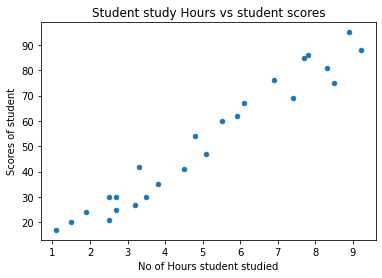

In [9]:
df.plot(kind='scatter',x='Hours',y='Scores')
plt.xlabel('No of Hours student studied')
plt.ylabel('Scores of student')
plt.title('Student study Hours vs student scores')

from scatter plot,we can clearly see that No of study Hours increse then student score also increase and also we can see these are positve correlated to each other.

In [10]:
df.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [11]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


No of study Hours and student score are positve correlated with strenght 0.97. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

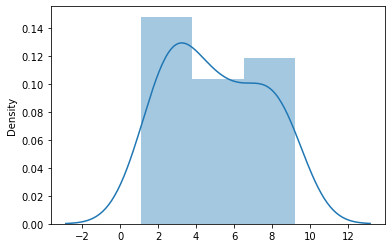

In [12]:
sns.distplot(x=df['Hours'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

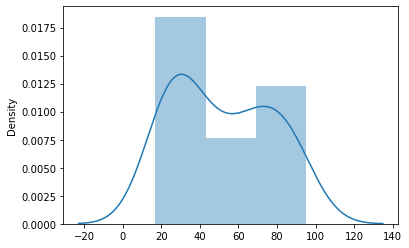

In [13]:
sns.distplot(x=df['Scores'])


In [14]:
#Linear Model

In [15]:

#y=df.iloc[:,1].values
#x=df.iloc[:,:-1].values
y=df.drop(columns='Hours',axis=1)
x=df.drop(columns='Scores',axis=1)




### Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=200)

## Training the Algorithms

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

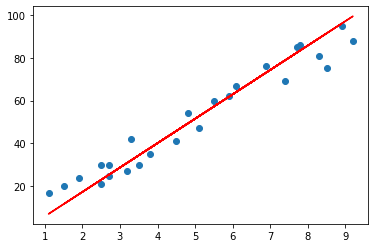

In [18]:
m=reg.coef_
c=reg.intercept_
l=m*x+c
plt.scatter(x,y)
plt.plot(x,l,'r-')
plt.show()

In [51]:
scores_pred=reg.predict(x_test)



In [55]:
actual_pred=pd.DataFrame(np.c_[x_test,y_test,scores_pred],columns=['Hours','actual_values','predicted_score'])
actual_pred

,Hours,actual_values,predicted_score
0,7.4,69.0,78.851514
1,3.8,35.0,37.874666
2,3.2,27.0,31.045191
3,1.9,24.0,16.247996
4,6.9,76.0,73.160285
5,6.1,67.0,64.054319
6,2.5,21.0,23.077471
7,1.5,20.0,11.695013
8,2.7,30.0,25.353963
9,3.3,42.0,32.183437


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


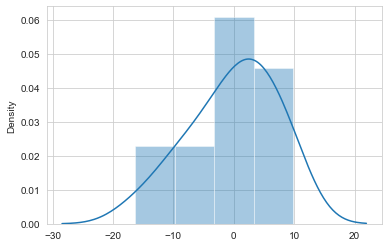

In [35]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-scores_pred))
plt.show()

what would be a predicted score if student studies for a 9.5 hrs/days?

## Model Evaluation

In [36]:
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_absolute_error  
print("mean_absolute_error:",mean_absolute_error(y_test,scores_pred))  
print("r2_scores:",r2_score(y_test,scores_pred))  



mean_absolute_error: 5.887622439893143
r2_scores: 0.9176876367401703


In [37]:
a =r2_score(y_test,scores_pred)
print(f'Our Model can give {a} % accurate results that is good model')


Our Model can give 0.9176876367401703 % accurate results that is good model


### Predicting score if a student studies for 9.5 hrs/day

In [38]:
Hours=9.5
score_of_student=reg.predict([[9.25]])
print('No of Hours study:',Hours)
print('student scores:',score_of_student[0].round(2))

No of Hours study: 9.5
student scores: [99.91]


### Conclusion: If the student studies for 9.5 hrs/day , then according to our model he/she can score 99.91%

### Thank You!